In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
%matplotlib inline

In [38]:
vw=pd.read_csv(r'C:\Users\KulkarniPa\Downloads\INeuron\PawanDataPractice\Linear Regression\vw.csv')
vw.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5


In [39]:
vw.describe()

,year,price,mileage,tax,mpg,engineSize
count,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000
mean,2017.255789,16838.952365,22092.785644,112.744277,53.753355,1.600693
std,2.053059,7755.015206,21148.941635,63.482617,13.642182,0.461695
min,2000.000000,899.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,10990.000000,5962.000000,30.000000,46.300000,1.200000
50%,2017.000000,15497.000000,16393.000000,145.000000,53.300000,1.600000
75%,2019.000000,20998.000000,31824.000000,145.000000,60.100000,2.000000
max,2020.000000,69994.000000,212000.000000,580.000000,188.300000,3.200000


In [40]:
vw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15157 entries, 0 to 15156
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         15157 non-null  object 
 1   year          15157 non-null  int64  
 2   price         15157 non-null  int64  
 3   transmission  15157 non-null  object 
 4   mileage       15157 non-null  int64  
 5   fuelType      15157 non-null  object 
 6   tax           15157 non-null  int64  
 7   mpg           15157 non-null  float64
 8   engineSize    15157 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.0+ MB


In [41]:
vw.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

#Now we will check EDA

<AxesSubplot:>

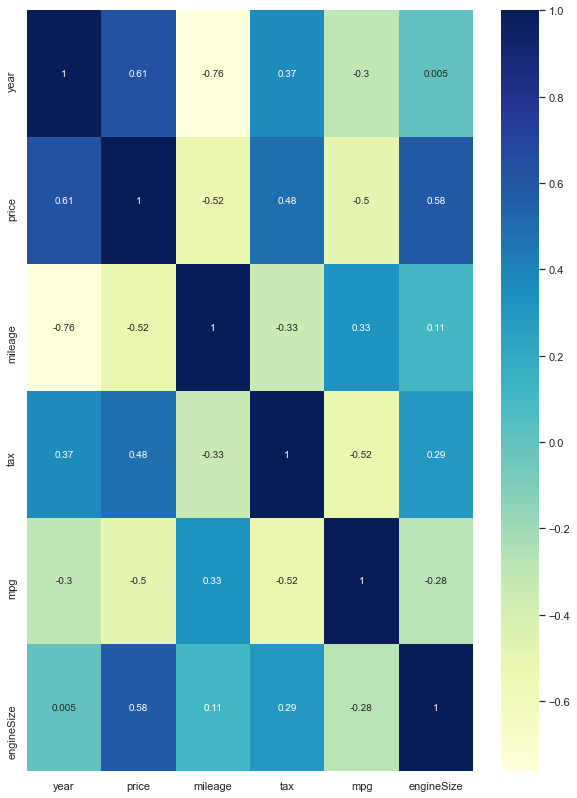

In [42]:
#Correlation between variables
plt.figure(figsize=(10,14))
sns.heatmap(vw.corr(),annot=True, cmap='YlGnBu')

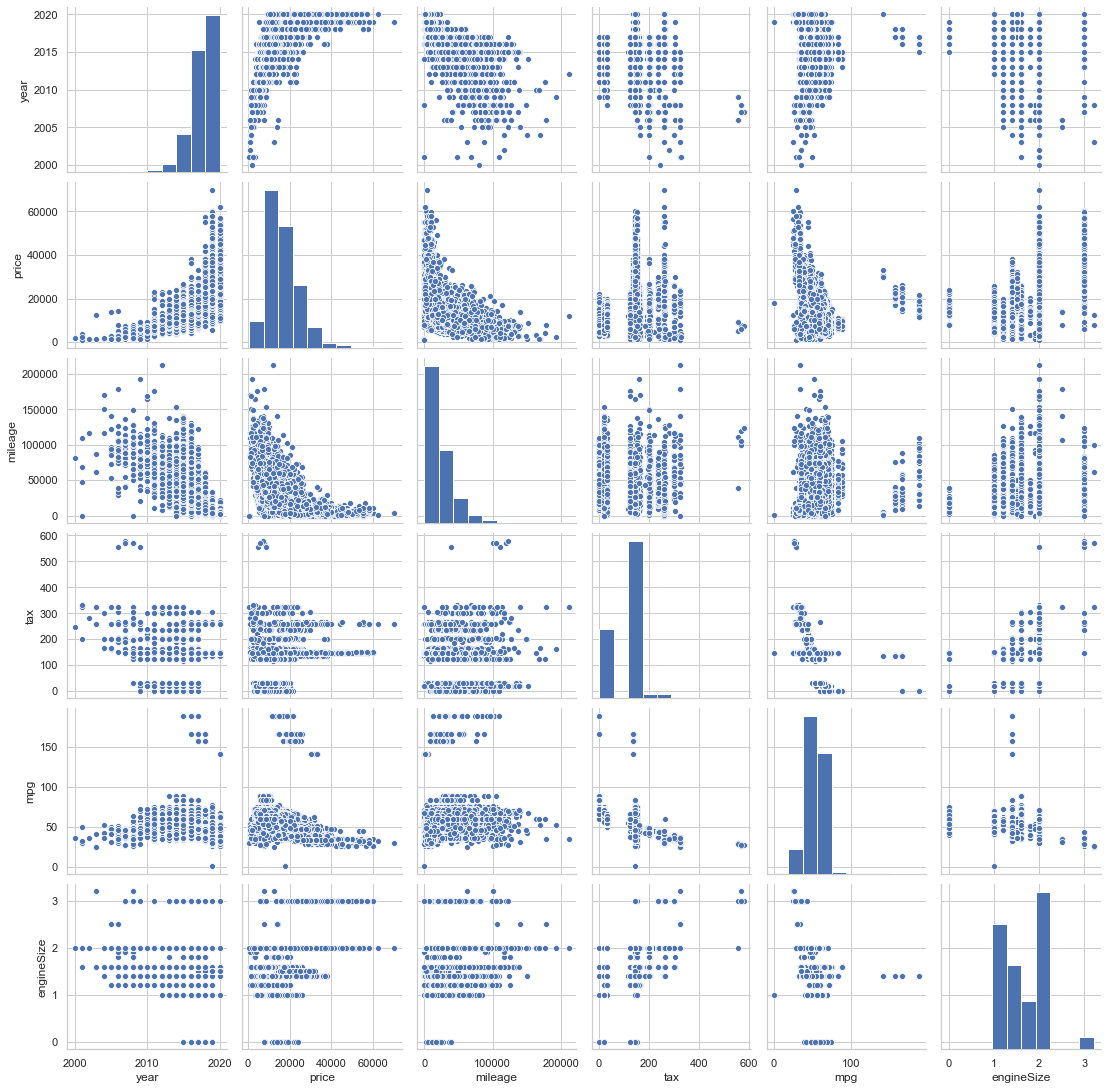

In [43]:
sns.pairplot(vw)

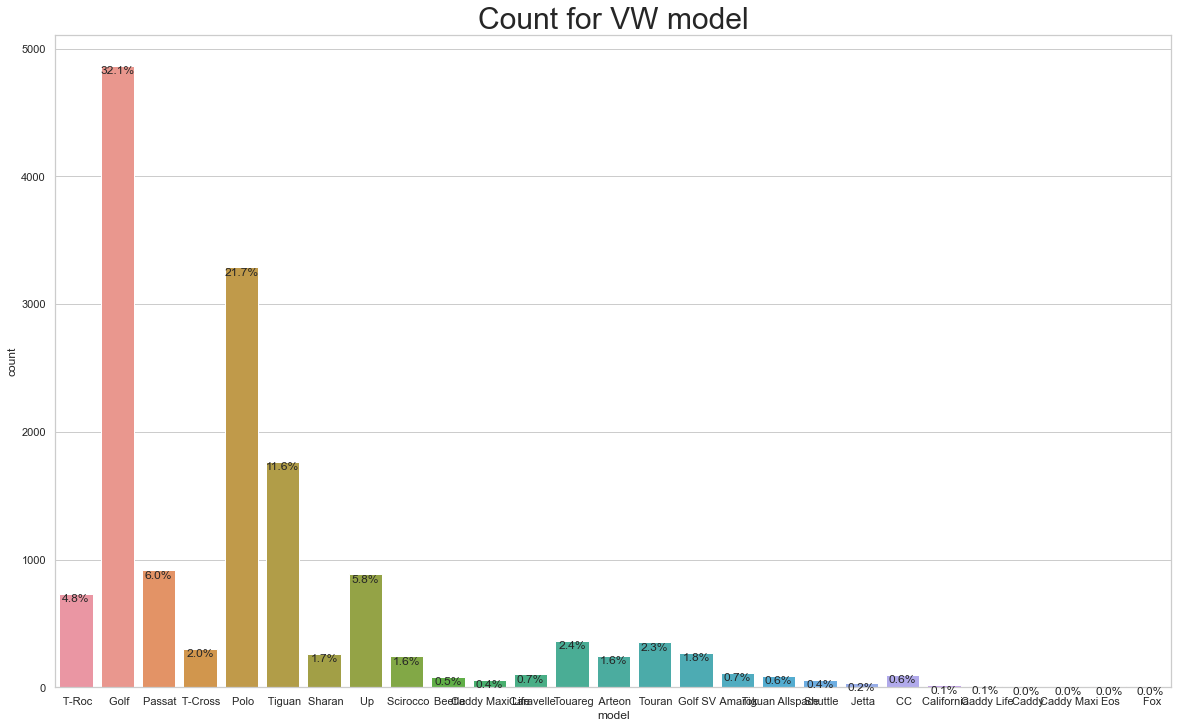

In [44]:
sns.set(style='whitegrid')
plt.figure(figsize=(20,12))
total= float(len(vw))
ax=sns.countplot(x='model', data=vw)
plt.title('Count for VW model', fontsize=30)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x()+p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage,(x,y),ha='center', va='top')

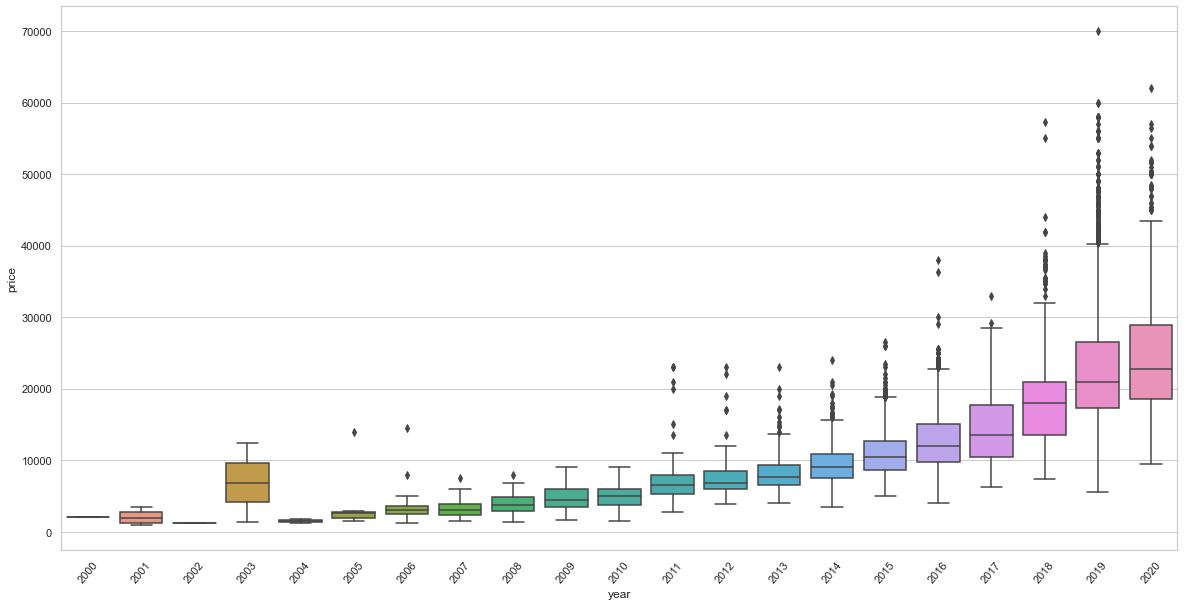

In [10]:
plt.figure(figsize=(20,10))
fig = sns.boxplot(x='year', y='price', data=vw)
plt.xticks(rotation=50)
plt.show()

#Here we can see that price of new model is high than old model and for year 2000 and 2002 ,only 1 car of model has been sold.

In [11]:
vw[vw['year'] == 2000]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
4830,Golf,2000,1999,Manual,80670,Petrol,245,35.8,2.0


<Figure size 1440x720 with 0 Axes>

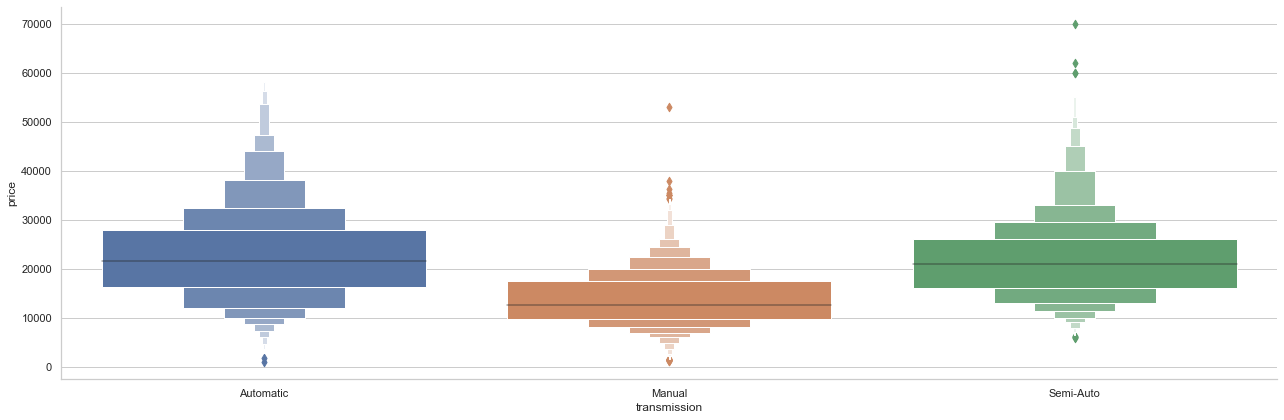

In [45]:
plt.figure(figsize=(20,10))
sns.catplot(y='price', x='transmission', data=vw.sort_values('price'), kind='boxen', height=6, aspect=3)

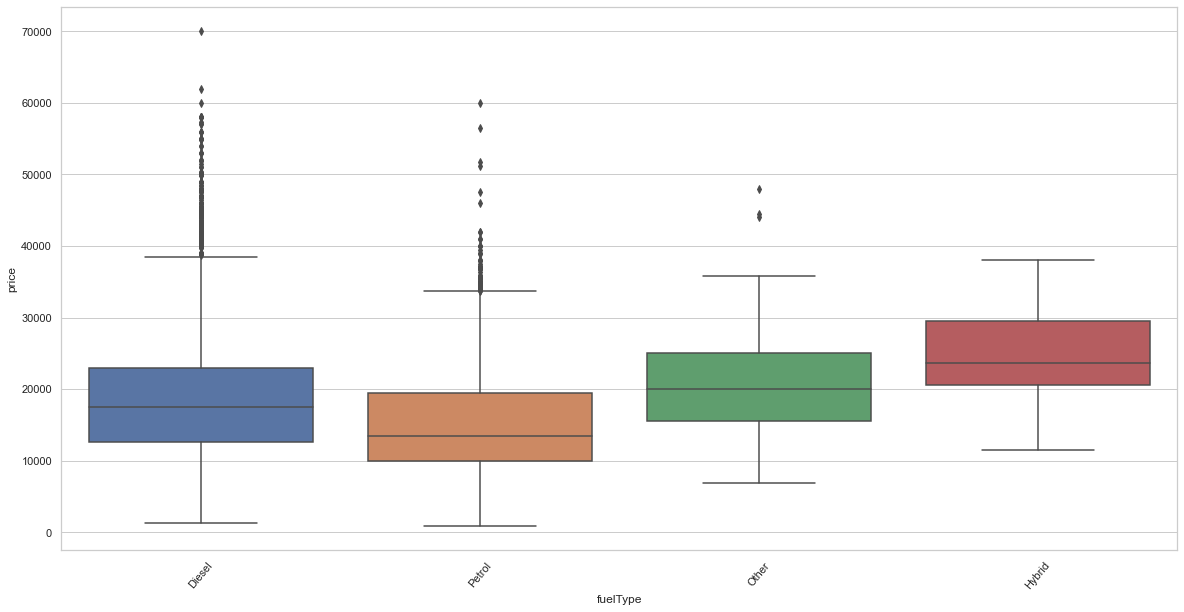

In [46]:
plt.figure(figsize=(20,10))
fig = sns.boxplot(x='fuelType', y='price', data=vw)
plt.xticks(rotation=50)
plt.show()

Here we can see that Diesel prices are very high compared to rest as it has very high values ranges

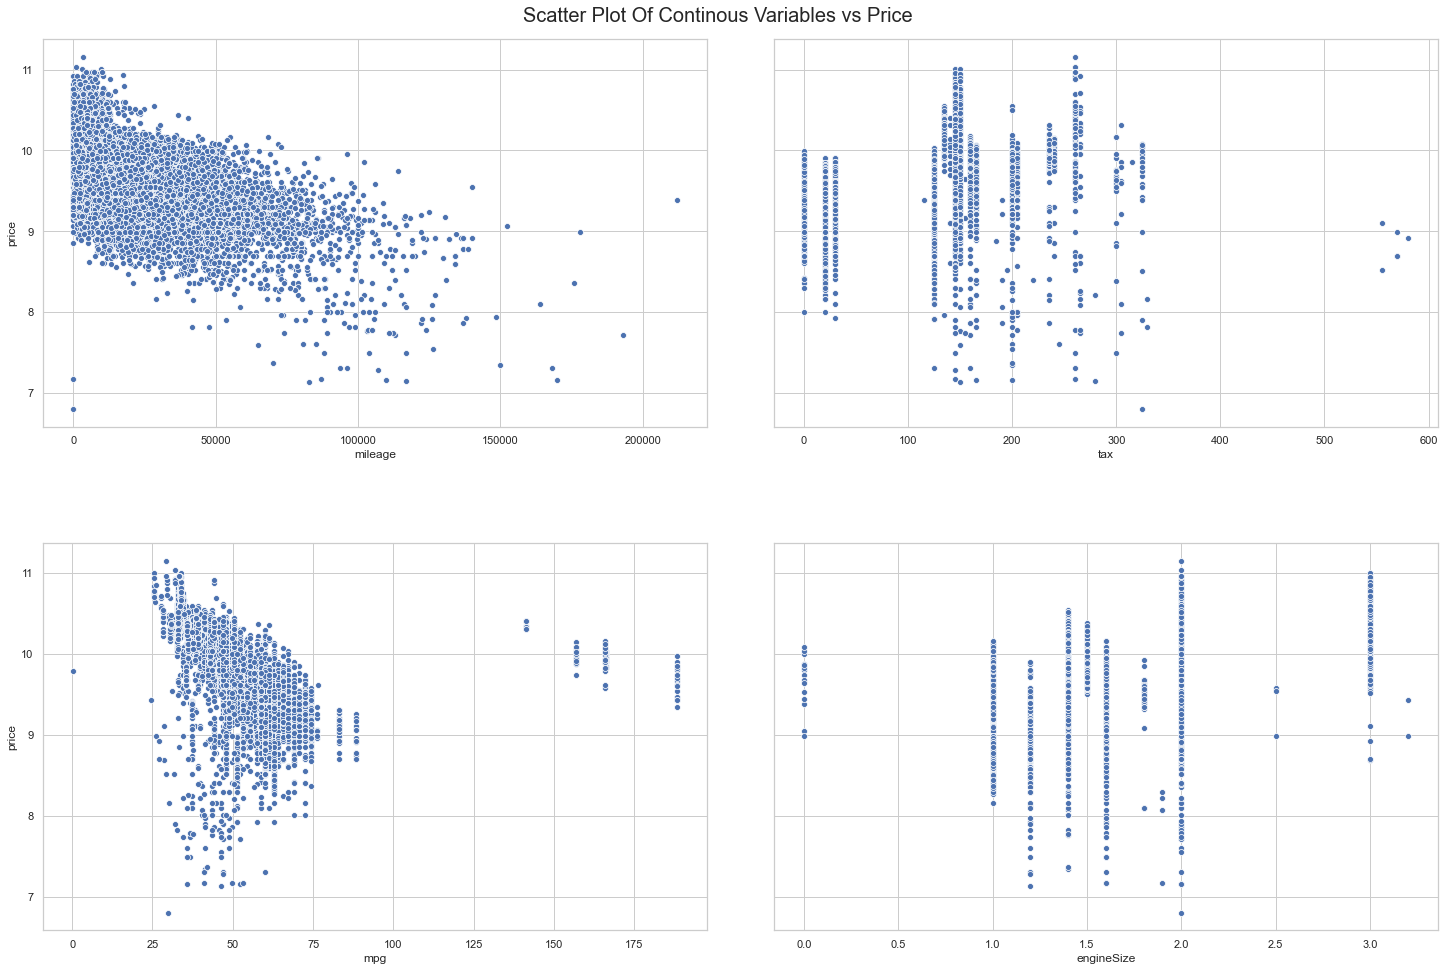

In [47]:
cols = ['mileage', 'tax', 'mpg','engineSize']
fig,axes = plt.subplots(2,2,figsize=(25,15),sharey=True)
fig.subplots_adjust(wspace=0.1, hspace=0.3)
fig.suptitle('Scatter Plot Of Continous Variables vs Price',fontsize = 20)
fig.subplots_adjust(top=0.95)
axes = axes.ravel()
for i, col in enumerate(cols):
    x = vw[col]
    y = vw['price'].apply(np.log)
    sns.scatterplot(x,y, ax=axes[i])

Here we can see that there is strong association between Mileage and price, enginesize and price

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

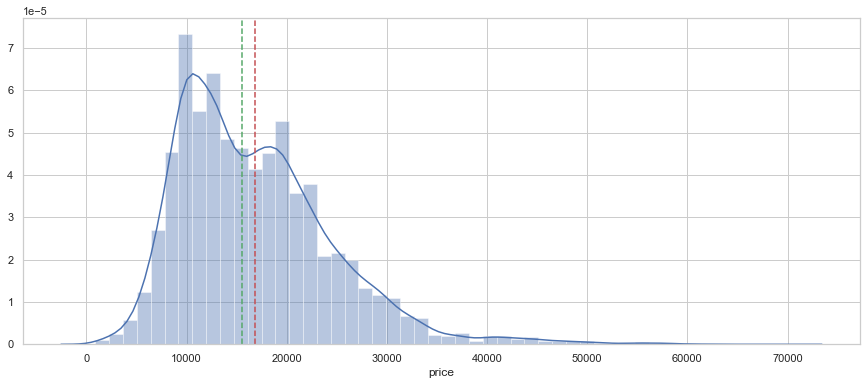

In [48]:
#Now we will see distribution of target variable.
f,ax=plt.subplots(1, sharex=True, figsize=(15,6))
mean_price = vw['price'].mean()
median_price = vw['price'].median()
mode_price = vw['price'].mode()
sns.distplot(vw['price'],ax=ax)
ax.axvline(mean_price, color='r', linestyle='--', label="Mean")
ax.axvline(median_price, color='g', linestyle='--', label="Median")
ax.axvline(mode_price, color='b', linestyle='--', label="Mode")
ax.legend()
plt.xlim()
plt.show()

In [49]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3-Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [50]:
lowerbound, upperbound = outlier_treatment(vw.price)
print(lowerbound)
print(upperbound)

-4022.0
36010.0


In [51]:
#Treating outlier by 0.01 percentile for lower value outlier and for upper value use 0.99 percentile value outlier.
import scipy.stats
scipy.stats.mstats.winsorize(vw['price'], limits=0.01)

masked_array(data=[25000, 26883, 20000, ...,  4795,  4795,  4795],
             mask=False,
       fill_value=999999,
            dtype=int64)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

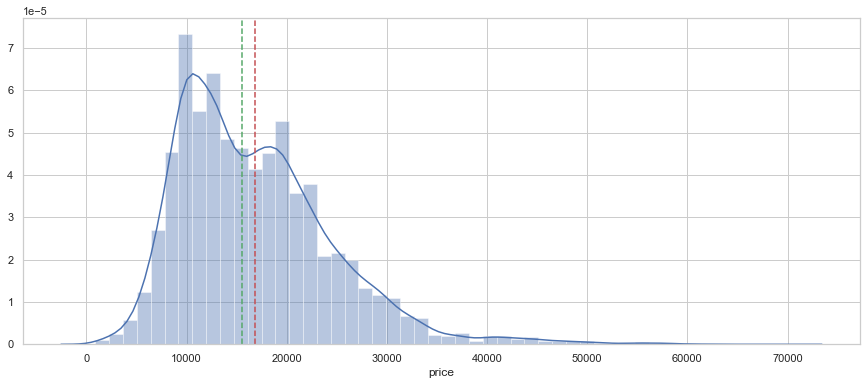

In [52]:
#Now we will see distribution of target variable.
f,ax=plt.subplots(1, sharex=True, figsize=(15,6))
mean_price = vw['price'].mean()
median_price = vw['price'].median()
mode_price = vw['price'].mode()
sns.distplot(vw['price'],ax=ax)
ax.axvline(mean_price, color='r', linestyle='--', label="Mean")
ax.axvline(median_price, color='g', linestyle='--', label="Median")
ax.axvline(mode_price, color='b', linestyle='--', label="Mode")
ax.legend()
plt.xlim()
plt.show()

In [53]:
vw.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [54]:
#Handling categorical data
categorical_col = ['model','transmission', 'fuelType']
dummies=pd.get_dummies(vw[categorical_col])
print(dummies)

       model_ Amarok  model_ Arteon  model_ Beetle  model_ CC  model_ Caddy  \
0                  0              0              0          0             0   
1                  0              0              0          0             0   
2                  0              0              0          0             0   
3                  0              0              0          0             0   
4                  0              0              0          0             0   
...              ...            ...            ...        ...           ...   
15152              0              0              0          0             0   
15153              0              0              0          0             0   
15154              0              0              0          0             0   
15155              0              0              0          0             0   
15156              0              0              0          0             0   

       model_ Caddy Life  model_ Caddy Maxi  model_

In [55]:
 #removing dummy trap variables
dummies.drop(['model_ Amarok','transmission_Semi-Auto','fuelType_Other'],axis=1,inplace=True)

In [56]:
vw = pd.concat([vw,dummies],axis=1)
vw.drop(categorical_col, axis=1, inplace=True)

In [57]:
vw.columns

Index(['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize', 'model_ Arteon',
       'model_ Beetle', 'model_ CC', 'model_ Caddy', 'model_ Caddy Life',
       'model_ Caddy Maxi', 'model_ Caddy Maxi Life', 'model_ California',
       'model_ Caravelle', 'model_ Eos', 'model_ Fox', 'model_ Golf',
       'model_ Golf SV', 'model_ Jetta', 'model_ Passat', 'model_ Polo',
       'model_ Scirocco', 'model_ Sharan', 'model_ Shuttle', 'model_ T-Cross',
       'model_ T-Roc', 'model_ Tiguan', 'model_ Tiguan Allspace',
       'model_ Touareg', 'model_ Touran', 'model_ Up',
       'transmission_Automatic', 'transmission_Manual', 'fuelType_Diesel',
       'fuelType_Hybrid', 'fuelType_Petrol'],
      dtype='object')

In [58]:
X=vw.drop('price',axis=1)
y=vw['price']

In [59]:
X_train,X_test,y_train,y_test= train_test_split(X, y, test_size=0.3, random_state=42)

In [73]:
X_train_lr1 = sm.add_constant(X_train)
lrl=sm.OLS(X_train,y_train).fit()
lrl.summary

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x0000025257F6FE48>>

In [79]:
vif_data=pd.DataFrame()
vif_data['Feature']=X_train.columns
vif_data

,Feature
0,year
1,mileage
2,tax
3,mpg
4,engineSize
5,model_ Arteon
6,model_ Beetle
7,model_ CC
8,model_ Caddy
9,model_ Caddy Life


In [81]:
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]
print(vif_data)

                   Feature         VIF
0                     year  602.047572
1                  mileage    2.969402
2                      tax    7.309951
3                      mpg   51.999550
4               engineSize   67.030951
5            model_ Arteon    3.415626
6            model_ Beetle    1.852646
7                model_ CC    1.892509
8             model_ Caddy    1.068171
9        model_ Caddy Life    1.097796
10       model_ Caddy Maxi    1.061841
11  model_ Caddy Maxi Life    1.625226
12       model_ California    1.145810
13        model_ Caravelle    1.987509
14              model_ Eos    1.070375
15              model_ Fox    1.016019
16             model_ Golf   51.585067
17          model_ Golf SV    3.863449
18            model_ Jetta    1.334417
19           model_ Passat   10.252487
20             model_ Polo   39.643481
21         model_ Scirocco    3.445928
22           model_ Sharan    3.516763
23          model_ Shuttle    1.582602
24          model_ T-Cros

In [85]:
X_train_new = X_train.drop(['fuelType_Petrol','fuelType_Diesel', 'engineSize','mpg'], axis=1)
X_train_new.columns

Index(['year', 'mileage', 'tax', 'model_ Arteon', 'model_ Beetle', 'model_ CC',
       'model_ Caddy', 'model_ Caddy Life', 'model_ Caddy Maxi',
       'model_ Caddy Maxi Life', 'model_ California', 'model_ Caravelle',
       'model_ Eos', 'model_ Fox', 'model_ Golf', 'model_ Golf SV',
       'model_ Jetta', 'model_ Passat', 'model_ Polo', 'model_ Scirocco',
       'model_ Sharan', 'model_ Shuttle', 'model_ T-Cross', 'model_ T-Roc',
       'model_ Tiguan', 'model_ Tiguan Allspace', 'model_ Touareg',
       'model_ Touran', 'model_ Up', 'transmission_Automatic',
       'transmission_Manual', 'fuelType_Hybrid'],
      dtype='object')

In [86]:
X_train_lr2=sm.add_constant(X_train_new)
lr2=sm.OLS(y_train,X_train_new).fit()

In [88]:
print(lr2.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              9010.
Date:                Tue, 20 Jul 2021   Prob (F-statistic):                        0.00
Time:                        17:37:37   Log-Likelihood:                     -1.0160e+05
No. Observations:               10609   AIC:                                  2.033e+05
Df Residuals:                   10577   BIC:                                  2.035e+05
Df Model:                          32                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [89]:
vif_data=pd.DataFrame()
vif_data['Feature']=X_train_new.columns
vif_data

,Feature
0,year
1,mileage
2,tax
3,model_ Arteon
4,model_ Beetle
5,model_ CC
6,model_ Caddy
7,model_ Caddy Life
8,model_ Caddy Maxi
9,model_ Caddy Maxi Life


In [90]:
vif_data["VIF1"] = [variance_inflation_factor(X_train_new.values, i) for i in range(len(X_train_new.columns))]
print(vif_data)

                   Feature        VIF1
0                     year  163.508190
1                  mileage    2.698842
2                      tax    6.109714
3            model_ Arteon    3.214401
4            model_ Beetle    1.735095
5                model_ CC    1.821028
6             model_ Caddy    1.061896
7        model_ Caddy Life    1.090605
8        model_ Caddy Maxi    1.051214
9   model_ Caddy Maxi Life    1.571153
10       model_ California    1.130275
11        model_ Caravelle    1.884205
12              model_ Eos    1.063770
13              model_ Fox    1.012993
14             model_ Golf   45.398566
15          model_ Golf SV    3.432092
16            model_ Jetta    1.306746
17           model_ Passat    9.350977
18             model_ Polo   31.089414
19         model_ Scirocco    3.269841
20           model_ Sharan    3.296736
21          model_ Shuttle    1.537394
22          model_ T-Cross    4.026445
23            model_ T-Roc    7.573266
24           model_ Tigua

In [91]:
X_train_newset = X_train_new.drop(['model_ Golf','model_ Tiguan', 'model_ Polo'], axis=1)
X_train_newset.columns

Index(['year', 'mileage', 'tax', 'model_ Arteon', 'model_ Beetle', 'model_ CC',
       'model_ Caddy', 'model_ Caddy Life', 'model_ Caddy Maxi',
       'model_ Caddy Maxi Life', 'model_ California', 'model_ Caravelle',
       'model_ Eos', 'model_ Fox', 'model_ Golf SV', 'model_ Jetta',
       'model_ Passat', 'model_ Scirocco', 'model_ Sharan', 'model_ Shuttle',
       'model_ T-Cross', 'model_ T-Roc', 'model_ Tiguan Allspace',
       'model_ Touareg', 'model_ Touran', 'model_ Up',
       'transmission_Automatic', 'transmission_Manual', 'fuelType_Hybrid'],
      dtype='object')

In [92]:
X_train_lr3=sm.add_constant(X_train_newset)
lr3=sm.OLS(y_train,X_train_newset).fit()

In [93]:
print(lr3.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.946
Model:                            OLS   Adj. R-squared (uncentered):              0.946
Method:                 Least Squares   F-statistic:                              6433.
Date:                Tue, 20 Jul 2021   Prob (F-statistic):                        0.00
Time:                        17:42:39   Log-Likelihood:                     -1.0381e+05
No. Observations:               10609   AIC:                                  2.077e+05
Df Residuals:                   10580   BIC:                                  2.079e+05
Df Model:                          29                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [94]:
vif_data=pd.DataFrame()
vif_data['Feature']=X_train_newset.columns
vif_data

,Feature
0,year
1,mileage
2,tax
3,model_ Arteon
4,model_ Beetle
5,model_ CC
6,model_ Caddy
7,model_ Caddy Life
8,model_ Caddy Maxi
9,model_ Caddy Maxi Life


In [95]:
vif_data["VIF2"] = [variance_inflation_factor(X_train_newset.values, i) for i in range(len(X_train_newset.columns))]
print(vif_data)

                   Feature       VIF2
0                     year  11.746317
1                  mileage   2.637642
2                      tax   5.352287
3            model_ Arteon   1.059519
4            model_ Beetle   1.023354
5                model_ CC   1.025036
6             model_ Caddy   1.002019
7        model_ Caddy Life   1.001523
8        model_ Caddy Maxi   1.004005
9   model_ Caddy Maxi Life   1.011211
10       model_ California   1.010698
11        model_ Caravelle   1.035849
12              model_ Eos   1.004836
13              model_ Fox   1.001272
14          model_ Golf SV   1.031847
15            model_ Jetta   1.006169
16           model_ Passat   1.138658
17         model_ Scirocco   1.031656
18           model_ Sharan   1.040783
19          model_ Shuttle   1.008825
20          model_ T-Cross   1.070359
21            model_ T-Roc   1.114663
22  model_ Tiguan Allspace   1.019454
23          model_ Touareg   1.124024
24           model_ Touran   1.038285
25          

In [97]:
y_pred=lr3.predict(X_train_newset)

Text(0.5, 0, 'Errors')

<Figure size 1440x864 with 0 Axes>

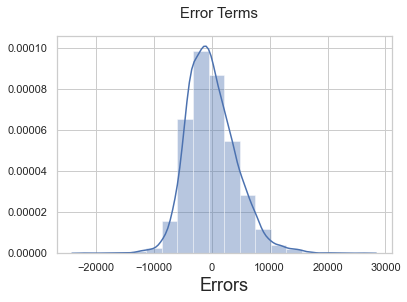

In [98]:
#Now will check the assumptions of Normlaity
plt.figure(figsize=(20,12))
fig = plt.figure()
sns.distplot((y_train - y_pred), bins = 18)
fig.suptitle('Error Terms', fontsize = 15)                  
plt.xlabel('Errors', fontsize = 18)    

In [103]:
X_test_new=X_test.drop(['fuelType_Petrol','fuelType_Diesel', 'engineSize','mpg', 'model_ Golf','model_ Tiguan', 'model_ Polo'], axis=1)
X_test_new

,year,mileage,tax,model_ Arteon,model_ Beetle,model_ CC,model_ Caddy,model_ Caddy Life,model_ Caddy Maxi,model_ Caddy Maxi Life,...,model_ Shuttle,model_ T-Cross,model_ T-Roc,model_ Tiguan Allspace,model_ Touareg,model_ Touran,model_ Up,transmission_Automatic,transmission_Manual,fuelType_Hybrid
7342,2018,5256,145,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10328,2019,6800,145,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
14992,2017,15899,20,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8466,2016,23365,20,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10347,2016,10209,160,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1642,2017,38206,20,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8603,2017,41777,145,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4779,2017,26630,145,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8573,2020,1920,145,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [104]:
X_test_new.columns

Index(['year', 'mileage', 'tax', 'model_ Arteon', 'model_ Beetle', 'model_ CC',
       'model_ Caddy', 'model_ Caddy Life', 'model_ Caddy Maxi',
       'model_ Caddy Maxi Life', 'model_ California', 'model_ Caravelle',
       'model_ Eos', 'model_ Fox', 'model_ Golf SV', 'model_ Jetta',
       'model_ Passat', 'model_ Scirocco', 'model_ Sharan', 'model_ Shuttle',
       'model_ T-Cross', 'model_ T-Roc', 'model_ Tiguan Allspace',
       'model_ Touareg', 'model_ Touran', 'model_ Up',
       'transmission_Automatic', 'transmission_Manual', 'fuelType_Hybrid'],
      dtype='object')

In [106]:
y_pred=lr3.predict(X_test_new)
y_pred

7342     17688.373542
10328    17472.277101
14992    10788.612813
8466     12584.451884
10347    21522.703135
             ...     
1642     14709.197863
8603     12333.563779
4779     19126.853583
8573     18196.348831
2666      5927.859867
Length: 4548, dtype: float64

Text(0, 0.5, 'y_pred')

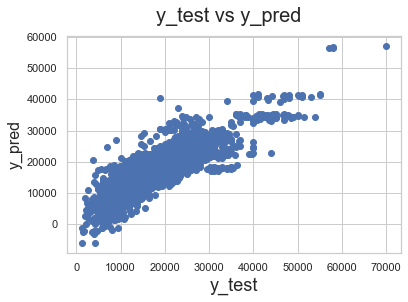

In [107]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

In [108]:
#Calculate the r square for test
r2score= r2_score(y_test, y_pred)
r2score

0.702202760841937